# CATS: Data Exploration (Historical)#

### Imports ###

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data Preview ###
Cat data was extracted from the data exported from the Champ_CAT_Preprocessing notebook.

In [2]:
cat_data = pd.read_csv('cat_data.csv', index_col=0)

In [3]:
print("Total entries: ", len(cat_data))
cat_data.head()

Total entries:  57350


,AnimalID,Gender,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeType,OutcomeSubtype,IntakeMonth,IntakeYear,IntakeDotW,OutcomeMonth,OutcomeYear,OutcomeDotW,IntakeAge,TimeUntilOutcome,LiveOutcome,IntakeTypes,Color,Breed
0,A366370,MALE,FEARFUL,HEALTHY,ALTERED,EUTH,FERAL,11,2008,4,11,2008,2,NaN,5,0,"STRAY,OTC",WHITE,SHORT
1,A366531,UNKNOWN,NORMAL,HEALTHY,UNKNOWN,EUTH,CONTAG DIS,11,2008,0,11,2008,2,NaN,9,0,"STRAY,OTC",BLACK,SHORT
2,A314432,UNKNOWN,NORMAL,HEALTHY,UNKNOWN,EUTH,TIME/SPACE,6,2007,4,6,2007,4,NaN,0,0,"OWNERSUR,OTC",BROWN,SHORT
3,A317335,UNKNOWN,NORMAL,HEALTHY,UNKNOWN,EUTH,TIME/SPACE,7,2007,3,7,2007,2,NaN,6,0,"STRAY,OTC",GRAY,SHORT
4,A317486,FEMALE,NURSING,HEALTHY,FERTILE,EUTH,TIME/SPACE,7,2007,4,7,2007,3,NaN,6,0,"STRAY,OTC",GRAY,SHORT


### Exploring Intake Type Volume and Distributions ###

#### Number of Intakes Annually ####

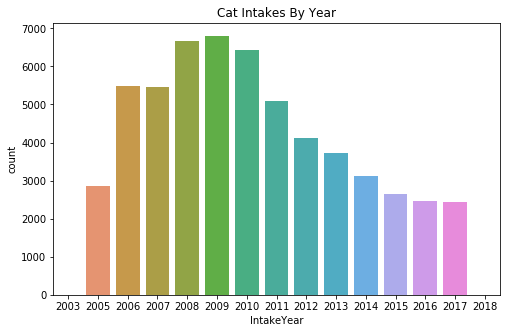

In [4]:
fig, ax = plt.subplots()
ax = sns.countplot(x = "IntakeYear", data = cat_data)
ax.set_title("Cat Intakes By Year")
fig.set_size_inches(8, 5)

It seems that the number of intakes peaked during the recession (2008-2009) and slowly has gone down since then. It should be noted that data from 2018 is incomplete and is therefore showing an exceptionally low number.

#### Average Number of Intakes by Month ####

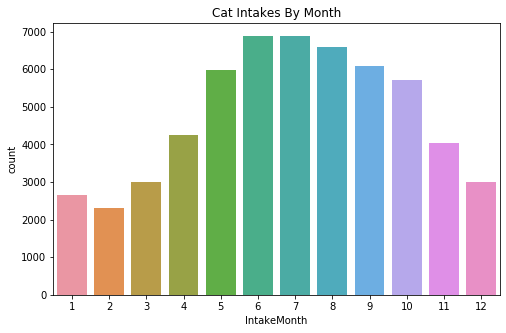

In [5]:
fig, ax = plt.subplots()
ax = sns.countplot(x = "IntakeMonth", data = cat_data)
ax.set_title("Cat Intakes By Month")
fig.set_size_inches(8, 5)

For cats, the greatest number of intakes occurs during the summer months (June-August) and the least occurs during the winter months (January-March).

#### Average Number of Intakes by Day of the Week ####

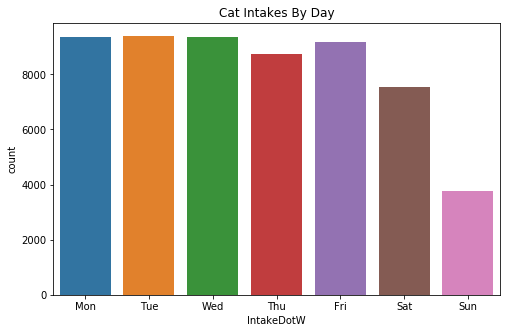

In [6]:
fig, ax = plt.subplots()
ax = sns.countplot(x = "IntakeDotW", data = cat_data)
ax.set_title("Cat Intakes By Day")
ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
fig.set_size_inches(8, 5)

Intakes happen most often on weekdays, decreasing slightly on Saturdays, and being exceptionally low on Sundays. This is likely due to the fact that most shelters will be open on weekdays, while some may close on Saturdays, and a significant number being closed on Sundays.

#### IntakeType Counts ####

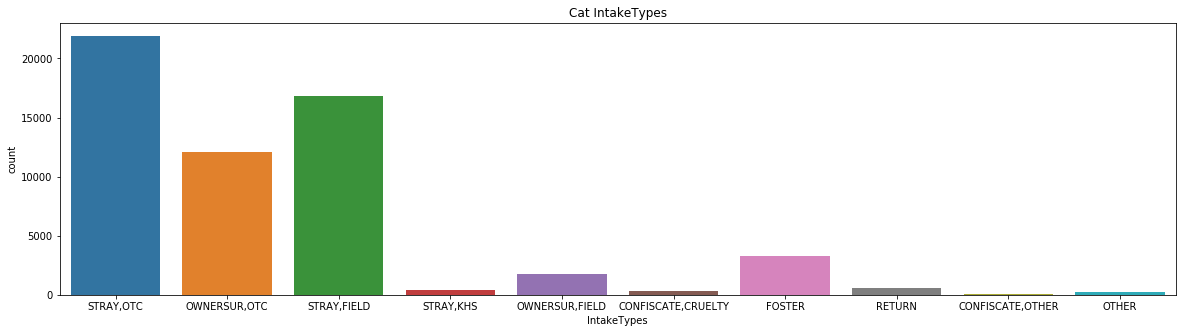

In [7]:
fig, ax = plt.subplots()
ax = sns.countplot(x = "IntakeTypes", data = cat_data)
ax.set_title("Cat IntakeTypes")
fig.set_size_inches(20, 5)

The three dominant IntakeTypes are strays (both brought into the shelter and caught in the field) and owner surrenders where the owner brought the cat to the shelter. Surprisingly, very few animals in the shelter were confiscated.

#### IntakeAge Distribution ####

In [8]:
ValidAges = cat_data[cat_data['IntakeAge'] > 0]     # cats with an IntakeAge that is not NaN
YoungAges = ValidAges[ValidAges['IntakeAge'] < 365] # cats that are younger than 1 year old

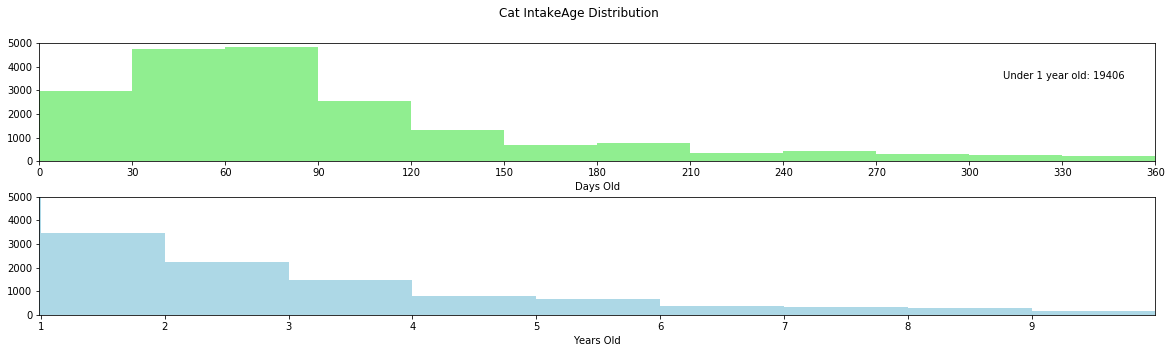

In [9]:
fig, (ax1,ax2) = plt.subplots(2)

ax1.hist(YoungAges['IntakeAge'], bins=range(0,390,30), color='lightgreen')
ax1.set_xticks(range(0,390,30))
ax1.set_xlim(0, 360)
ax1.set_ylim(0, 5000)
ax1.set_xlabel('Days Old')
plt.text(3200,10000,'Under 1 year old: {}'.format(len(YoungAges)))

ax2.hist(ValidAges['IntakeAge'], bins=range(0,4015,365), color='lightblue')
ax2.set_xticks(range(0,3650,365))
ax2.set_xticklabels(range(0,11))
ax2.set_xlim(360, 3650)
ax2.set_ylim(0, 5000)
ax2.set_xlabel('Years Old')

fig.suptitle('Cat IntakeAge Distribution')
fig.set_size_inches(20, 5)
plt.subplots_adjust(hspace=0.3)

By far the largest bin for cat intake age is between 0-1 years old, with a very large percentage of those being under 3 months old. From there, there is an inverse relationship between number of animals per bin and age.

#### TimeUntilOutcome Distribution ####

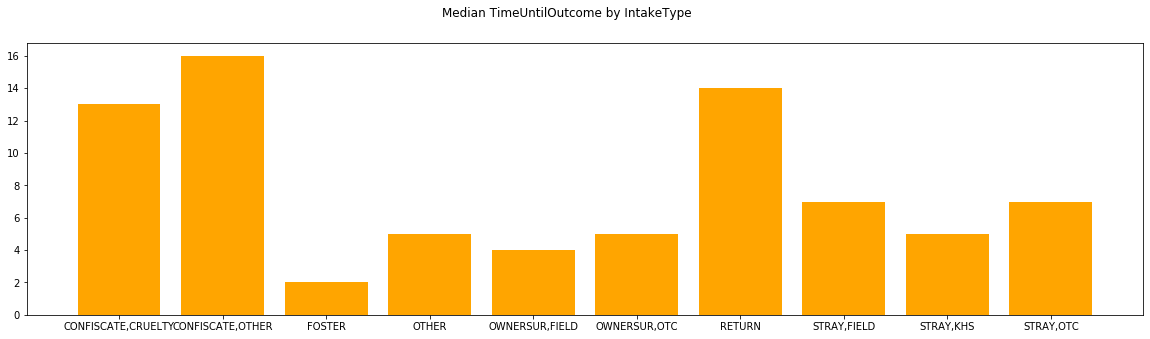

In [30]:
tuoBYit = cat_data.groupby('IntakeTypes').median()['TimeUntilOutcome']

x_labs = tuoBYit.index
y_labs = tuoBYit.values

fig, ax = plt.subplots()
ax = plt.bar(x_labs, y_labs, color='orange')
fig.suptitle('Median TimeUntilOutcome by IntakeType')
fig.set_size_inches(20, 5)

There are some signficant variations between the average time it takes for an animal to experience an outcome depending on their intake type. For example, confiscated animals are typically in the shelter for around 2 weeks (possibly to get medical attention), whereas most other types hover around 1 week. Returns likely stay in the shelter so long because shelters know that they were adopted once and could be adopted again. As seen later, adopted animals typically stay in the shelter longer than non-adopted.

In [11]:
SO = cat_data[cat_data['IntakeTypes'] == 'STRAY,OTC']
SF = cat_data[cat_data['IntakeTypes'] == 'STRAY,FIELD']
OO = cat_data[cat_data['IntakeTypes'] == 'OWNERSUR,OTC']

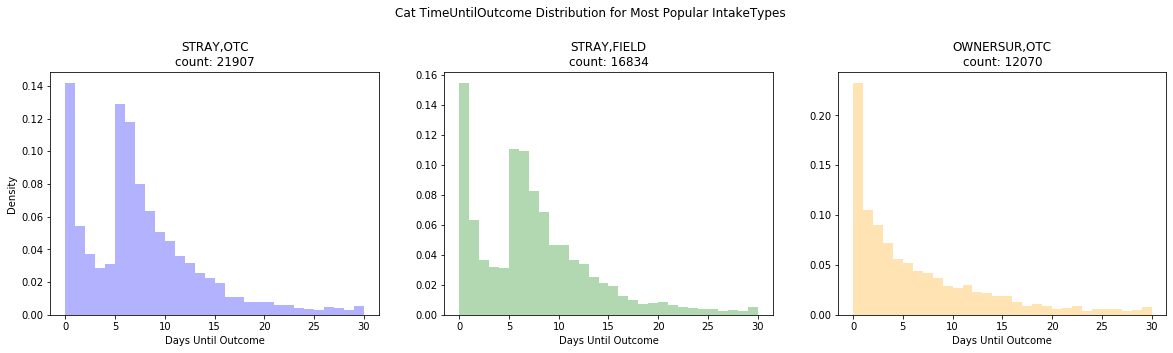

In [12]:
fig, axes = plt.subplots(1,3)

axes[0].hist(SO['TimeUntilOutcome'], bins=range(0,31), histtype='stepfilled', density=True, alpha=0.3, color='blue')
axes[1].hist(SF['TimeUntilOutcome'], bins=range(0,31), histtype='stepfilled', density=True, alpha=0.3, color='green')
axes[2].hist(OO['TimeUntilOutcome'], bins=range(0,31), histtype='stepfilled', density=True, alpha=0.3, color='orange')

axes[0].set_title('STRAY,OTC\ncount: {}'.format(len(SO)))
axes[1].set_title('STRAY,FIELD\ncount: {}'.format(len(SF)))
axes[2].set_title('OWNERSUR,OTC\ncount: {}'.format(len(OO)))

axes[0].set_ylabel('Density')
axes[0].set_xlabel('Days Until Outcome')
axes[1].set_xlabel('Days Until Outcome')
axes[2].set_xlabel('Days Until Outcome')

fig.suptitle('Cat TimeUntilOutcome Distribution for Most Popular IntakeTypes')
fig.subplots_adjust(top=0.8)
fig.set_size_inches(20, 5)

Strays typically have a very different distribution curve than when an owner surrenders their animal to the shelter. It seems that for strays, after about a week, there is a surge in outcome events that occur that quickly begin decreasing. For owner surrenders, this decrease happens from day one. This may indicate that strays are only put down after a certain amount of time or are only released to the public for adoption after a certain amount of time.

### Exploring Outcome Type Rates by Different Features ###

#### Defining Useful Function ####
This function will allow for quick crosstabulation of different features with OutcomeType. As seen below, the four major outcome types are 'ADOPTION', 'EUTH', 'FOSTER', and 'TRANSFER' and will be the only outcome types included in visuals.

In [13]:
def convert_to_pcent(cross1, cross2, features=['ADOPTION', 'EUTH', 'FOSTER', 'TRANSFER']):
    cross = pd.crosstab(cross1, cross2)
    cross_pcent = cross.iloc[0]/cross.iloc[0].sum()

    for i in range(1,len(cross)):
        cross_pcent_col = cross.iloc[i]/cross.iloc[i].sum()
        cross_pcent = pd.concat([cross_pcent, cross_pcent_col], axis=1)
    
    cross_pcent = cross_pcent.T
    cross_pcent.index = cross_pcent.index.rename(cross1.name)

    cross_pcent = cross_pcent[features]
    return cross_pcent.round(2)

#### Outcome Distribution ####

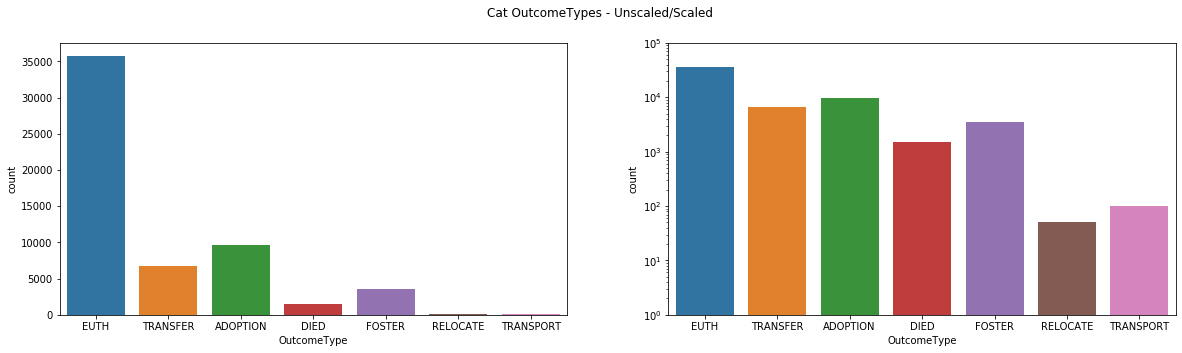

In [14]:
fig, axes = plt.subplots(1,2)
fig.suptitle("Cat OutcomeTypes - Unscaled/Scaled")

sns.countplot(x = "OutcomeType", data = cat_data, ax = axes[0])

sns.countplot(x = "OutcomeType", data = cat_data, ax = axes[1])
axes[1].set_yscale("log")
axes[1].set_ylim(1,100000)

fig.set_size_inches(20, 5)

By far, the most common outcome type is euthanasia, followed by adoption, transfer, and foster. For the remaining visuals, the focus will be on these top four.

#### OutcomeType Rate by IntakeYear ###

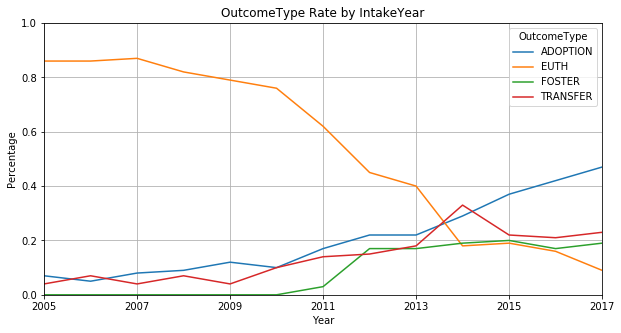

In [15]:
iyot_pcent = convert_to_pcent(cat_data.IntakeYear, cat_data.OutcomeType)
iyot_pcent.plot.line(figsize=(10,5))

plt.axis([2005,2017,0,1])
plt.title('OutcomeType Rate by IntakeYear')
plt.xlabel('Year')
plt.xticks(range(2005,2019,2))
plt.ylabel('Percentage')
plt.grid(True)

plt.show()

Fortunately, as time as gone on, the euthanasia rate at this shelter has dropped from over 80% in 2005 to 10% in 2017. Naturally, this means adoption rates have increased drastically. The foster rate has also increased from non-existant up until 2011 to nearly 20% in 2017. **This may be an indicator that foster programs decrease euthanasia rates in shelters.**

#### EUTH OutcomeSubtype Rate by IntakeYear ####

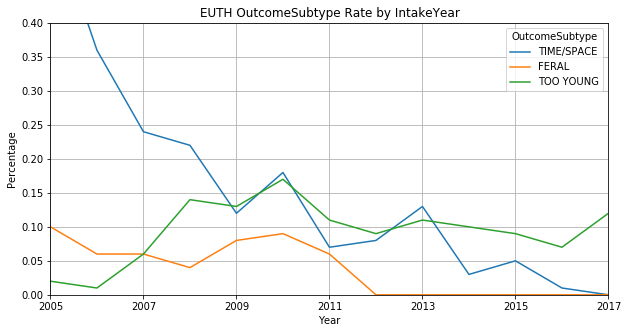

In [16]:
iyos_pcent = convert_to_pcent(cat_data.IntakeYear, cat_data.OutcomeSubtype, features=['TIME/SPACE', 'FERAL', 'TOO YOUNG'])
iyos_pcent.plot.line(figsize=(10,5))

plt.axis([2005,2017,0,0.4])
plt.title('EUTH OutcomeSubtype Rate by IntakeYear')
plt.xlabel('Year')
plt.xticks(range(2005,2019,2))
plt.ylabel('Percentage')
plt.grid(True)

plt.show()

Fortunately, as time goes on, cats are being put down far less frequently for 'TIME/SPACE' and 'FERAL'. Euthanasia for 'FERAL' seems to be almost non-existent as of 2012, possibly implying that there is no longer discrimination against feral cats.

#### Average OutcomeType Rate by IntakeMonth ####

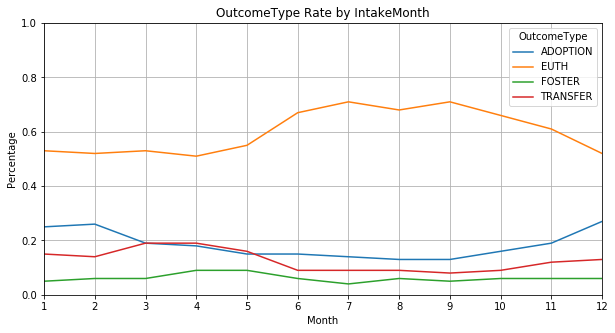

In [17]:
imot_pcent = convert_to_pcent(cat_data.IntakeMonth, cat_data.OutcomeType)
imot_pcent.plot.line(figsize=(10,5))

plt.axis([1,12,0,1])
plt.title('OutcomeType Rate by IntakeMonth')
plt.xlabel('Month')
plt.xticks(range(1,13))
plt.ylabel('Percentage')
plt.grid(True)

plt.show()

Given the largest increase in intakes during the summer months, it is unsurprising that the summer months have the highest euthanasia rate.

#### Average OutcomeType Rate by IntakeDotW ####

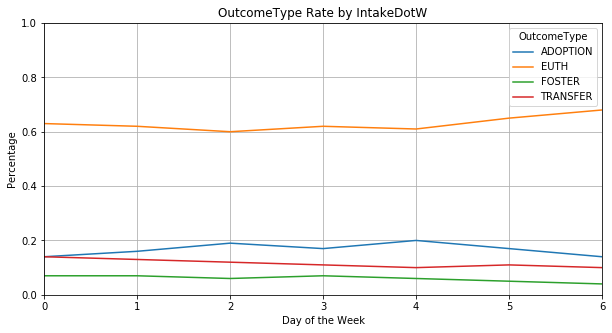

In [18]:
idot_pcent = convert_to_pcent(cat_data.IntakeDotW, cat_data.OutcomeType)
idot_pcent.plot.line(figsize=(10,5))

plt.axis([0,6,0,1])
plt.title('OutcomeType Rate by IntakeDotW')
plt.xlabel('Day of the Week')
plt.xticks(range(0,7))
plt.ylabel('Percentage')
plt.grid(True)

plt.show()

Interestingly, while outcome type rates are fairly consistent for most days of the week, animals brought in on a Sunday are significantly more likely to be euthanized. This could mean that animals brought in on Sunday were brought in emergently because of behavioral issues, but the data does not provide insight into why this is actually the case.

#### Average OutcomeType by OutcomeDotW ####
In other words, what outcomes happen on which day?

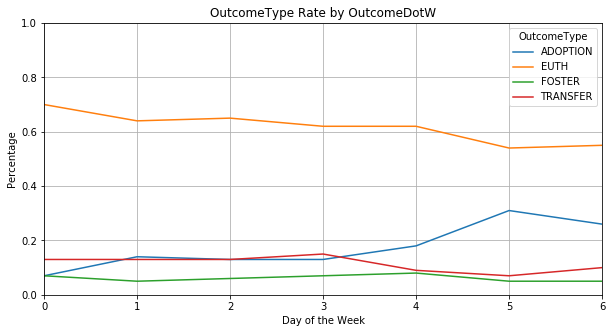

In [19]:
odot_pcent = convert_to_pcent(cat_data.OutcomeDotW, cat_data.OutcomeType)
odot_pcent.plot.line(figsize=(10,5))

plt.axis([0,6,0,1])
plt.title('OutcomeType Rate by OutcomeDotW')
plt.xlabel('Day of the Week')
plt.xticks(range(0,7))
plt.ylabel('Percentage')
plt.grid(True)

plt.show()

The data shows that adoption rates are highest at the end of the week/weekends. This could explain why euthanasia rates go down as the week progresses: shelters know that animals have the highest chance of being adopted on the weekends and so they are less likely to euthanize them as the busy adoption days approach.

#### OutcomeType Rate by IntakeType ####

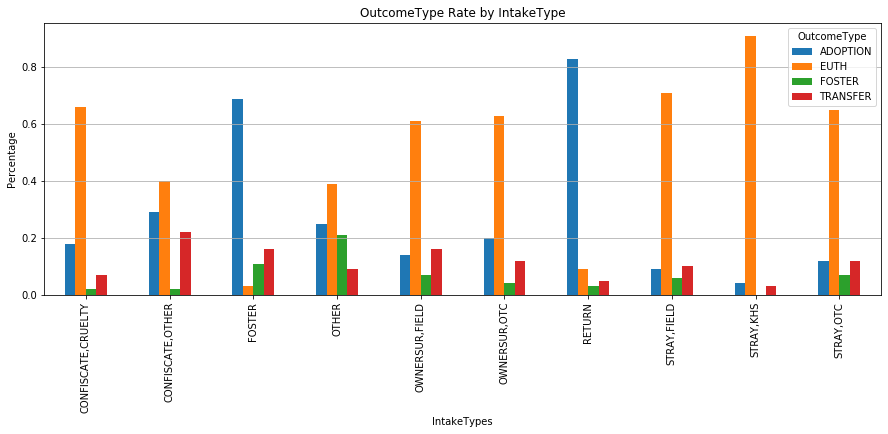

In [20]:
itot_pcent = convert_to_pcent(cat_data.IntakeTypes, cat_data.OutcomeType)
itot_pcent.plot.bar(figsize=(15,5))

plt.title('OutcomeType Rate by IntakeType')
plt.ylabel('Percentage')
plt.grid(True, axis='y')

plt.show()

Typically, confiscated animals and animals that were surrendered by owner typically have more favorable outcomes than strays. This makes sense because strays may be less domesticated, given that they were not brought in from a previous home. Fosters and returns have understandably high favorable outcomes because they were either deemed worthy of a foster or they already belonged to an owner who could have simply reclaimed them. 

**The fact that fosters have more favorable outcomes is significant in that it could mean that fostering does indeed help with an animal's chance for success**, but this is not definitive, because the reason why certain animals were fostered is unknown. They may already have been more desirable.

#### OutcomeType Rate by ReproductiveStatusAtIntake ####

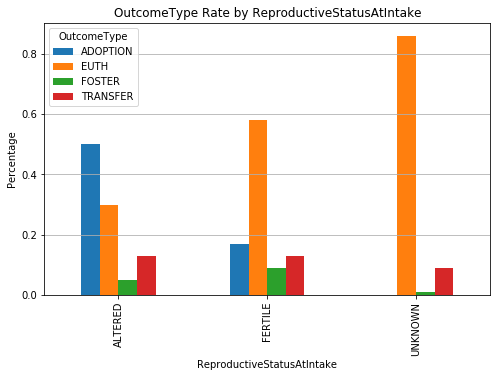

In [21]:
rsot_pcent = convert_to_pcent(cat_data.ReproductiveStatusAtIntake, cat_data.OutcomeType)
rsot_pcent.plot.bar(figsize=(8,5))

plt.title('OutcomeType Rate by ReproductiveStatusAtIntake')
plt.ylabel('Percentage')
plt.grid(True, axis='y')

plt.show()

As expected, fertile animals are euthanized much more often than sterile/altered. This is because a major problem in high-kill cities is that animals are not fixed. Euthanizing them over sterilized animals prevents them from producing more animals that will go back into the system. The high euthanasia rate for 'UNKNOWN' genders is likely due to a high number of kittens being unclassified and are put down very often, as seen further down.

#### OutcomeType Rate by Color ####

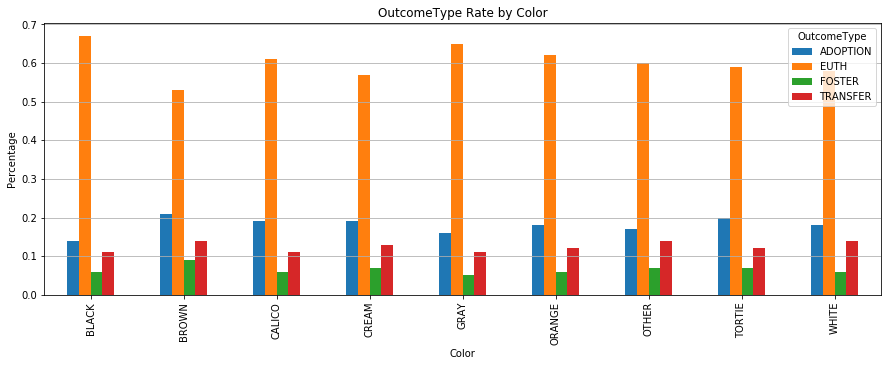

In [22]:
cot_pcent = convert_to_pcent(cat_data.Color, cat_data.OutcomeType)
cot_pcent.plot.bar(figsize=(15,5))

plt.title('OutcomeType Rate by Color')
plt.ylabel('Percentage')
plt.grid(True, axis='y')

plt.show()

There appears to be some correlation between color and euthanasia rate, with black and gray cats being euthanized significantly more than brown and cream cats.

#### OutcomeType Rate by Breed ####

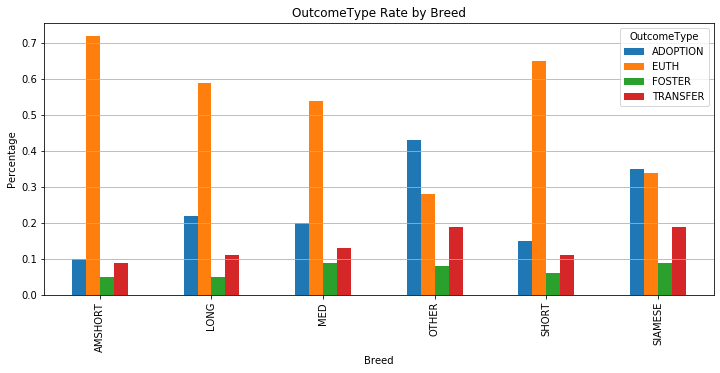

In [23]:
bot_pcent = convert_to_pcent(cat_data.Breed, cat_data.OutcomeType)
bot_pcent.plot.bar(figsize=(12,5))

plt.title('OutcomeType Rate by Breed')
plt.ylabel('Percentage')
plt.grid(True, axis='y')

plt.show()

As expected, there is also a signficant correlation between breed and euthanasia rate. The most common breeds, shorthaired cats, have the highest euthanasia rate, while other generic cat breeds (longhair and mediumhair) have a slightly lower rate. "Special" cats (where breed was something specific, such as Siamese or "Other") were euthanized at a much, much lower rate.

#### OutcomeType Rate by Gender ####

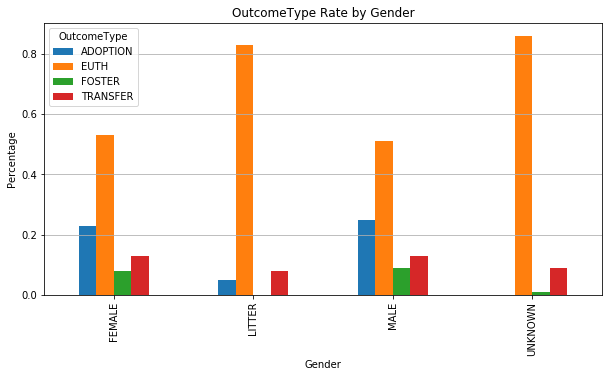

In [24]:
got_pcent = convert_to_pcent(cat_data.Gender, cat_data.OutcomeType)
got_pcent.plot.bar(figsize=(10,5))

plt.title('OutcomeType Rate by Gender')
plt.ylabel('Percentage')
plt.grid(True, axis='y')

plt.show()

Interestingly, females and males have a very similar euthanasia rate, although male cats have a slightly higher adoption rate. Not at all surprisingly, cats in a litter and of unknown gender (kittens) were euthanized at an exceptionally high rate.

### Exploring TimeUntilOutcome by OutcomeType ###

#### Median TimeUntilOutcome by OutcomeType ####

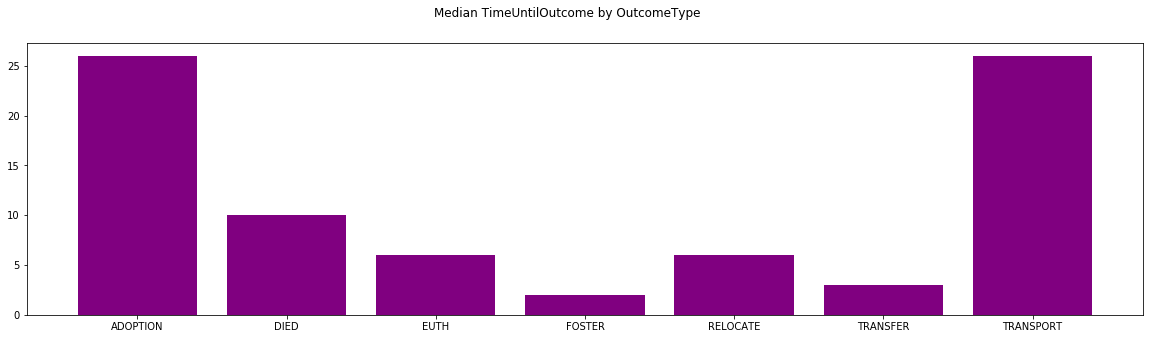

In [25]:
tuoBYot = cat_data.groupby('OutcomeType').median()['TimeUntilOutcome']

x_labs = tuoBYot.index
y_labs = tuoBYot.values

fig, ax = plt.subplots()
ax = plt.bar(x_labs, y_labs, color='purple')
fig.suptitle('Median TimeUntilOutcome by OutcomeType')
fig.set_size_inches(20, 5)

Somewhat surprisingly, euthanized animals stayed in the shelter the least amount of time before being put down. This is likely because many euthanized animals are put down because of their breed or behavioral observations. Adopted animals typically had much more time in the shelter. **This supports the idea that given more time (via fostering), animals will be put down less often.**

#### TimeUntilOutcome Distribution for Most Popular OutcomeTypes ####

In [26]:
E = cat_data[cat_data['OutcomeType'] == 'EUTH']
A = cat_data[cat_data['OutcomeType'] == 'ADOPTION']
T = cat_data[cat_data['OutcomeType'] == 'TRANSFER']
F = cat_data[cat_data['OutcomeType'] == 'FOSTER']

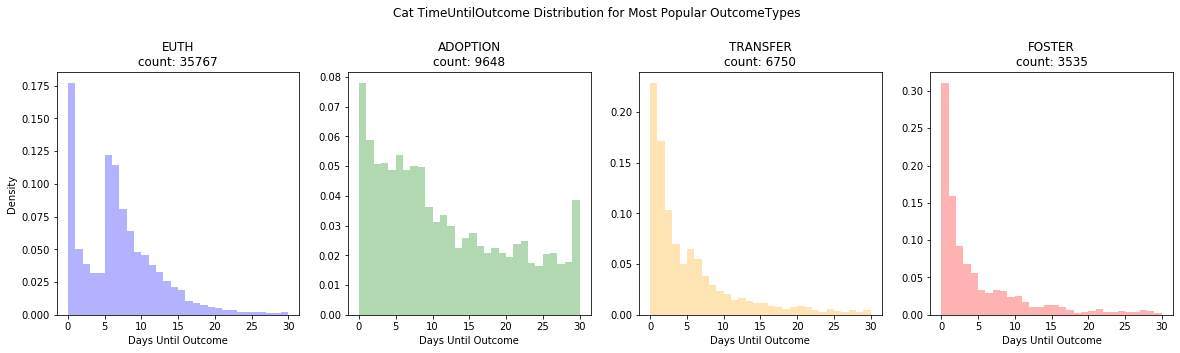

In [27]:
fig, axes = plt.subplots(1,4)

axes[0].hist(E['TimeUntilOutcome'], bins=range(0,31), histtype='stepfilled', density=True, alpha=0.3, color='blue')
axes[1].hist(A['TimeUntilOutcome'], bins=range(0,31), histtype='stepfilled', density=True, alpha=0.3, color='green')
axes[2].hist(T['TimeUntilOutcome'], bins=range(0,31), histtype='stepfilled', density=True, alpha=0.3, color='orange')
axes[3].hist(F['TimeUntilOutcome'], bins=range(0,31), histtype='stepfilled', density=True, alpha=0.3, color='red')

axes[0].set_title('EUTH\ncount: {}'.format(len(E)))
axes[1].set_title('ADOPTION\ncount: {}'.format(len(A)))
axes[2].set_title('TRANSFER\ncount: {}'.format(len(T)))
axes[3].set_title('FOSTER\ncount: {}'.format(len(F)))

axes[0].set_ylabel('Density')
axes[0].set_xlabel('Days Until Outcome')
axes[1].set_xlabel('Days Until Outcome')
axes[2].set_xlabel('Days Until Outcome')
axes[3].set_xlabel('Days Until Outcome')

fig.suptitle('Cat TimeUntilOutcome Distribution for Most Popular OutcomeTypes')
fig.subplots_adjust(top=0.8)
fig.set_size_inches(20, 5)

While the 'TRANSFER' and 'FOSTER' time distributions are similar, they are very different from the 'EUTH' and 'ADOPTION' distributions. It seems that transfers and fosters usually have immediate outcomes with the distribution steeply decreasing, while adoptions steadily decrease. As seen in the graph, the last bin has a high frequency and if extended, the graph would go well beyond 90 days. The euthanized distribution is very unique. It appears that shelters will either euthanize the animals on day 1 (breed, behavioral observation, etc.) and then wait. After a minimum period of time (about 5 days), euthanasia will begin.

#### TimeUntilOutcome Distribution for Most Popular "EUTH" Subtypes ####

In [28]:
TS = cat_data[cat_data['OutcomeSubtype'] == 'TIME/SPACE']
M = cat_data[cat_data['OutcomeSubtype'] == 'MEDICAL']
CD = cat_data[cat_data['OutcomeSubtype'] == 'CONTAG DIS']
BO = cat_data[cat_data['OutcomeSubtype'] == 'BEHAV OBSV']
TY = cat_data[cat_data['OutcomeSubtype'] == 'TOO YOUNG']
F = cat_data[cat_data['OutcomeSubtype'] == 'FERAL']

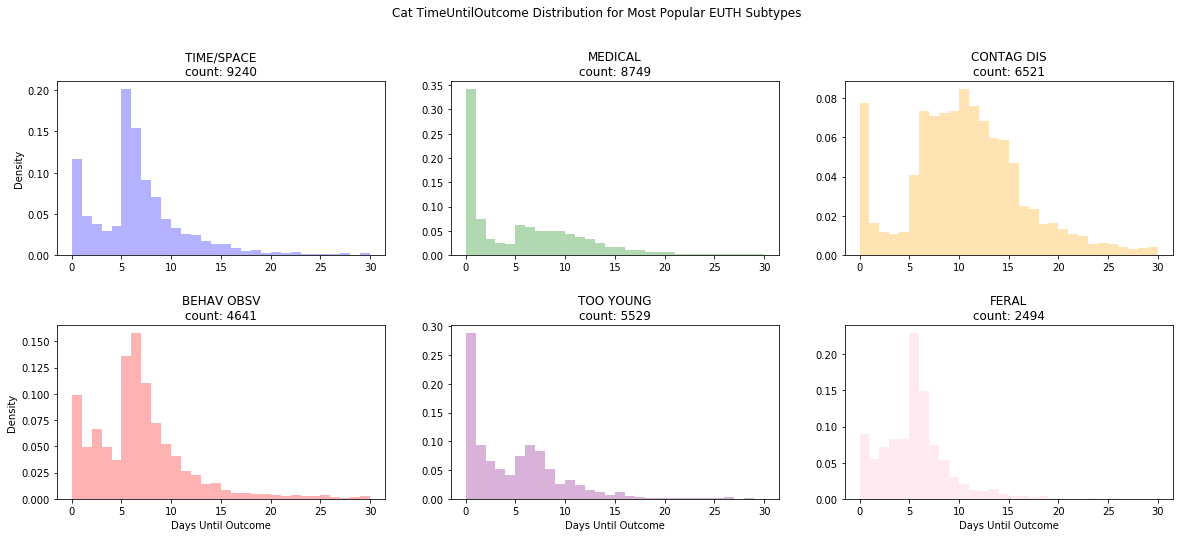

In [29]:
fig, axes = plt.subplots(2,3)

axes[0,0].hist(TS['TimeUntilOutcome'], bins=range(0,31), histtype='stepfilled', density=True, alpha=0.3, color='blue')
axes[0,1].hist(M['TimeUntilOutcome'], bins=range(0,31), histtype='stepfilled', density=True, alpha=0.3, color='green')
axes[0,2].hist(CD['TimeUntilOutcome'], bins=range(0,31), histtype='stepfilled', density=True, alpha=0.3, color='orange')
axes[1,0].hist(BO['TimeUntilOutcome'], bins=range(0,31), histtype='stepfilled', density=True, alpha=0.3, color='red')
axes[1,1].hist(TY['TimeUntilOutcome'], bins=range(0,31), histtype='stepfilled', density=True, alpha=0.3, color='purple')
axes[1,2].hist(F['TimeUntilOutcome'], bins=range(0,31), histtype='stepfilled', density=True, alpha=0.3, color='pink')

axes[0,0].set_title('TIME/SPACE\ncount: {}'.format(len(TS)))
axes[0,1].set_title('MEDICAL\ncount: {}'.format(len(M)))
axes[0,2].set_title('CONTAG DIS\ncount: {}'.format(len(CD)))
axes[1,0].set_title('BEHAV OBSV\ncount: {}'.format(len(BO)))
axes[1,1].set_title('TOO YOUNG\ncount: {}'.format(len(TY)))
axes[1,2].set_title('FERAL\ncount: {}'.format(len(F)))

axes[0,0].set_ylabel('Density')
axes[1,0].set_ylabel('Density')
axes[1,0].set_xlabel('Days Until Outcome')
axes[1,1].set_xlabel('Days Until Outcome')
axes[1,2].set_xlabel('Days Until Outcome')

fig.suptitle('Cat TimeUntilOutcome Distribution for Most Popular EUTH Subtypes')
fig.subplots_adjust(top=0.85, hspace=0.4)
fig.set_size_inches(20, 8)

Contrary to the previous conclusion, it seems that the day 1 euthasia and the 5-day wait period extends to most subtypes. The only exceptions being 'TOO YOUNG' (kittens that cannot survive without mother or are too great of a burden to get adopted) and 'FERAL'.